In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import svm
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import tree
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 100)

In [22]:
df = pd.read_csv('data/CollectionDatasets/MBA_ADMISSIONS.csv', encoding='utf-8')
df

,pre_score,Age_in_years,Percentage_in_10_Class,Percentage_in_12_Class,Percentage_in_Under_Graduate,percentage_MBA,post_score,Gender,STATE,Previous_Degree,Marital_status,Place_you_belong_to,perceived#Job#Skill,Specialization
0,75.000000,22,71.0,74.8,72.00,61.00,83.333333,Male,Central Zone,Engineering,Single,Urban,prefered skills,Marketing
1,71.666667,25,77.6,82.6,76.90,66.85,76.666667,Male,Central Zone,Engineering,Single,Semi Urban,prefered skills,LOS
2,76.666667,26,93.2,83.8,77.00,74.97,75.000000,Female,Central Zone,Engineering,Single,Urban,desired skills,Finance
3,66.666667,22,91.2,80.0,67.00,68.30,60.000000,Male,Central Zone,Commerce,Single,Semi Urban,prefered skills,Finance
4,71.666667,24,79.8,61.6,60.33,69.28,76.666667,Female,Central Zone,Engineering,Single,Urban,prefered skills,Finance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,71.666667,22,95.0,78.6,75.43,68.54,88.333333,Male,Central Zone,Engineering,Single,Urban,prefered skills,Marketing
469,71.666667,25,77.6,82.6,76.90,66.85,76.666667,Male,Central Zone,Engineering,Single,Semi Urban,prefered skills,LOS
470,76.666667,26,93.2,83.8,77.00,74.97,75.000000,Female,Central Zone,Engineering,Single,Urban,desired skills,Finance
471,66.666667,22,91.2,80.0,67.00,68.30,60.000000,Male,Central Zone,Commerce,Single,Semi Urban,prefered skills,Finance


In [23]:
df.isna().sum()

pre_score                       0
Age_in_years                    0
Percentage_in_10_Class          0
Percentage_in_12_Class          0
Percentage_in_Under_Graduate    0
percentage_MBA                  0
post_score                      0
Gender                          0
STATE                           0
Previous_Degree                 0
Marital_status                  0
Place_you_belong_to             0
perceived#Job#Skill             0
Specialization                  0
dtype: int64

In [24]:
df.dtypes

pre_score                       float64
Age_in_years                      int64
Percentage_in_10_Class          float64
Percentage_in_12_Class          float64
Percentage_in_Under_Graduate    float64
percentage_MBA                  float64
post_score                      float64
Gender                           object
STATE                            object
Previous_Degree                  object
Marital_status                   object
Place_you_belong_to              object
perceived#Job#Skill              object
Specialization                   object
dtype: object

In [25]:
df.nunique()

pre_score                        38
Age_in_years                      8
Percentage_in_10_Class           88
Percentage_in_12_Class           99
Percentage_in_Under_Graduate     92
percentage_MBA                  106
post_score                       34
Gender                            2
STATE                             6
Previous_Degree                   5
Marital_status                    2
Place_you_belong_to               3
perceived#Job#Skill               3
Specialization                    4
dtype: int64

In [26]:
for col in df.dtypes[df.dtypes == 'object'].index:
    print(col, df[col].unique())

Gender ['Male' 'Female']
STATE ['Central Zone' 'East Zone' 'North East' 'North Zone' 'South Zone'
 'West Zone']
Previous_Degree ['Engineering' 'Commerce' 'Management' 'Science' 'Arts']
Marital_status ['Single' 'Married']
Place_you_belong_to ['Urban' 'Semi Urban' 'Rural']
perceived#Job#Skill ['prefered skills' 'desired skills' 'required skills']
Specialization ['Marketing' 'LOS' 'Finance' 'HR']


In [27]:
df['Gender_m'] = df['Gender'].astype('category').cat.codes
df['Marital_status_sgl'] = df['Marital_status'].astype('category').cat.codes
df['Place_you_belong_to_code'] = df['Place_you_belong_to'].astype('category').cat.codes
df = pd.get_dummies(data=df, columns=['STATE', 'Previous_Degree', 'perceived#Job#Skill', 'Specialization'])

In [35]:
df

,pre_score,Age_in_years,Percentage_in_10_Class,Percentage_in_12_Class,Percentage_in_Under_Graduate,percentage_MBA,post_score,Gender_m,Marital_status_sgl,Place_you_belong_to_code,STATE_Central Zone,STATE_East Zone,STATE_North East,STATE_North Zone,STATE_South Zone,STATE_West Zone,Previous_Degree_Arts,Previous_Degree_Commerce,Previous_Degree_Engineering,Previous_Degree_Management,Previous_Degree_Science,perceived#Job#Skill_desired skills,perceived#Job#Skill_prefered skills,perceived#Job#Skill_required skills,Specialization_Finance,Specialization_HR,Specialization_LOS,Specialization_Marketing
0,75.000000,22,71.0,74.8,72.00,61.00,83.333333,1,1,2,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
1,71.666667,25,77.6,82.6,76.90,66.85,76.666667,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,76.666667,26,93.2,83.8,77.00,74.97,75.000000,0,1,2,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
3,66.666667,22,91.2,80.0,67.00,68.30,60.000000,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
4,71.666667,24,79.8,61.6,60.33,69.28,76.666667,0,1,2,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,71.666667,22,95.0,78.6,75.43,68.54,88.333333,1,1,2,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
469,71.666667,25,77.6,82.6,76.90,66.85,76.666667,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
470,76.666667,26,93.2,83.8,77.00,74.97,75.000000,0,1,2,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
471,66.666667,22,91.2,80.0,67.00,68.30,60.000000,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0


In [33]:
df = df.drop(['Gender','Marital_status','Place_you_belong_to'],axis=1)

<AxesSubplot:>

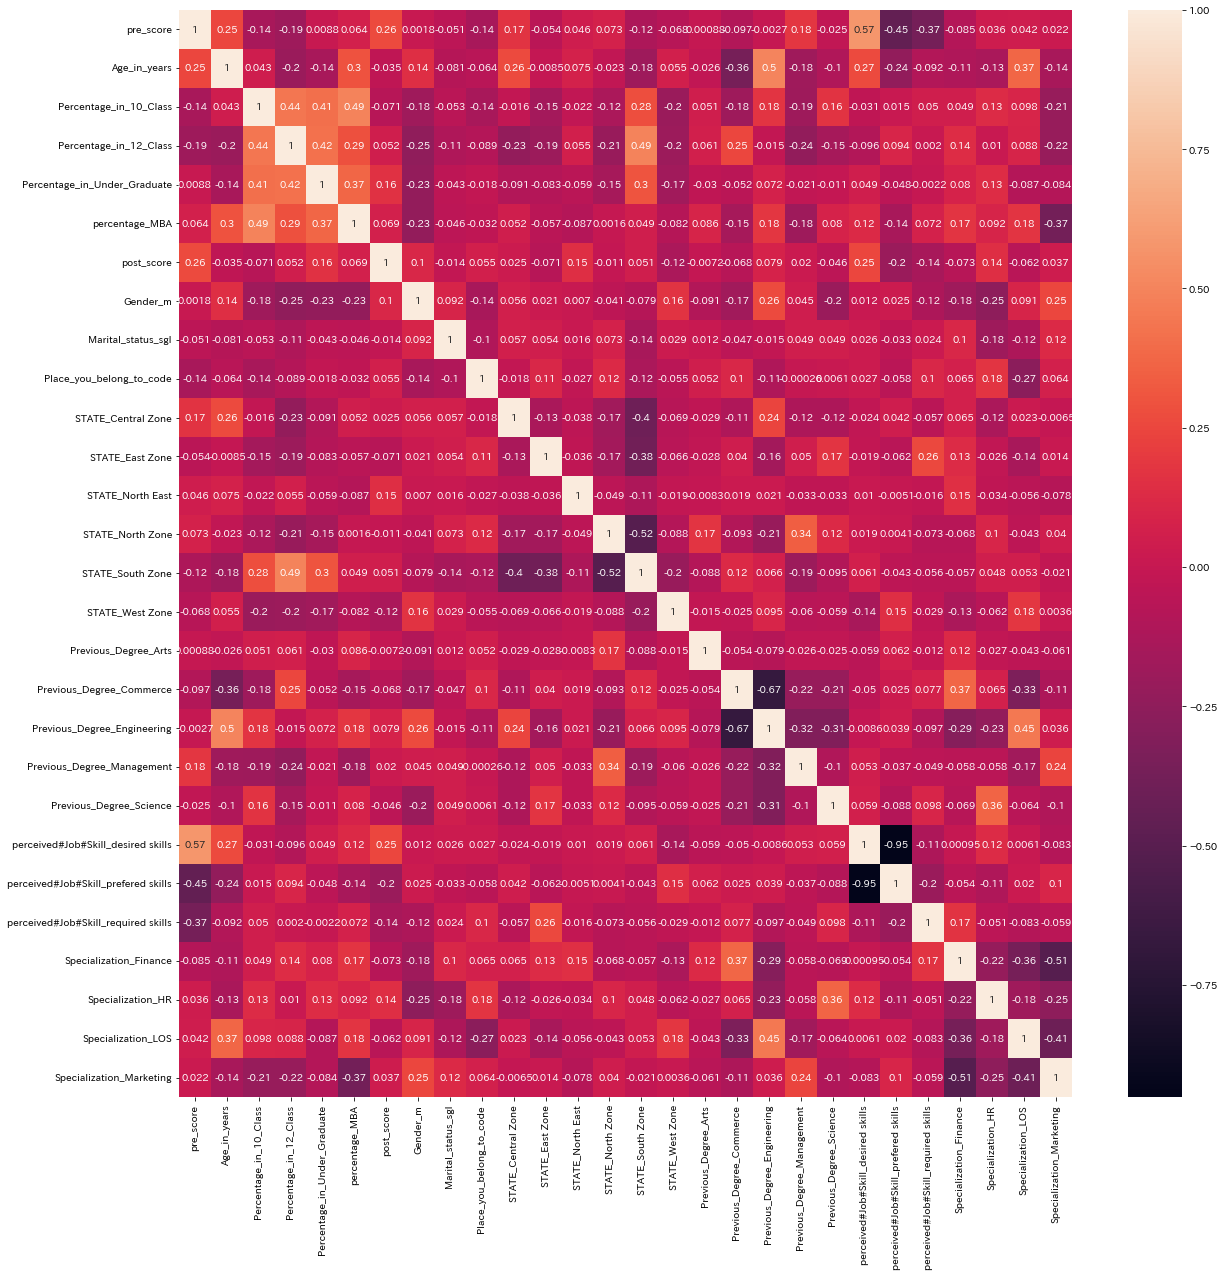

In [34]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

In [47]:
X = df.drop('Marital_status_sgl', axis=1)
y = df['Marital_status_sgl']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
print(X_train.shape)
print(X_test.shape)

(378, 27)
(95, 27)


In [48]:
models = [linear_model.LogisticRegression(),
          neighbors.KNeighborsClassifier(),
          svm.SVC(),
          naive_bayes.GaussianNB(),
          tree.DecisionTreeClassifier(max_depth=3),
          ensemble.RandomForestClassifier(max_depth=3),
          ensemble.GradientBoostingClassifier(n_estimators=100)]

In [49]:
df_model_comp = pd.DataFrame()
for model in models:
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['Accuracy(訓練)'] = metrics.accuracy_score(y_train, y_pred)
    dic['Precision(訓練)'] = metrics.precision_score(y_train, y_pred)
    dic['Recall(訓練)'] = metrics.recall_score(y_train, y_pred)
    dic['F1(訓練)'] = metrics.f1_score(y_train, y_pred)
    y_pred = model.predict(X_test)
    dic['Accuracy(テスト)'] = metrics.accuracy_score(y_test, y_pred)
    dic['Precision(テスト)'] = metrics.precision_score(y_test, y_pred)
    dic['Recall(テスト)'] = metrics.recall_score(y_test, y_pred)
    dic['F1(テスト)'] = metrics.f1_score(y_test, y_pred)
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp


C:\Users\ishih\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,モデル名,Accuracy(訓練),Precision(訓練),Recall(訓練),F1(訓練),Accuracy(テスト),Precision(テスト),Recall(テスト),F1(テスト)
0,LogisticRegression,0.976190,0.976190,1.000000,0.987952,0.978947,0.978947,1.000000,0.989362
1,KNeighborsClassifier,0.984127,0.984000,1.000000,0.991935,0.978947,0.978947,1.000000,0.989362
2,SVC,0.976190,0.976190,1.000000,0.987952,0.978947,0.978947,1.000000,0.989362
3,GaussianNB,0.939153,1.000000,0.937669,0.967832,0.905263,1.000000,0.903226,0.949153
4,DecisionTreeClassifier,0.984127,0.989218,0.994580,0.991892,0.978947,0.978947,1.000000,0.989362
5,RandomForestClassifier,0.976190,0.976190,1.000000,0.987952,0.978947,0.978947,1.000000,0.989362
6,GradientBoostingClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
X_train.dtypes[X_train.dtypes != 'uint8'].index

Index(['pre_score', 'Age_in_years', 'Percentage_in_10_Class',
       'Percentage_in_12_Class', 'Percentage_in_Under_Graduate',
       'percentage_MBA', 'post_score', 'Gender_m', 'Place_you_belong_to_code'],
      dtype='object')

In [51]:
from sklearn.preprocessing import StandardScaler

scaling_columns = X_train.dtypes[X_train.dtypes != 'uint8'].index
scaler = StandardScaler().fit(X_train[scaling_columns])

scaled_train = pd.DataFrame(scaler.transform(X_train[scaling_columns]), columns=scaling_columns, index=X_train.index)
X_train.update(scaled_train)

scaled_test = pd.DataFrame(scaler.transform(X_test[scaling_columns]), columns=scaling_columns, index=X_test.index)
X_test.update(scaled_test)

In [53]:
df_model_comp = pd.DataFrame()
for model in models:
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['Accuracy(訓練)'] = metrics.accuracy_score(y_train, y_pred)
    dic['Precision(訓練)'] = metrics.precision_score(y_train, y_pred)
    dic['Recall(訓練)'] = metrics.recall_score(y_train, y_pred)
    dic['F1(訓練)'] = metrics.f1_score(y_train, y_pred)
    y_pred = model.predict(X_test)
    dic['Accuracy(テスト)'] = metrics.accuracy_score(y_test, y_pred)
    dic['Precision(テスト)'] = metrics.precision_score(y_test, y_pred)
    dic['Recall(テスト)'] = metrics.recall_score(y_test, y_pred)
    dic['F1(テスト)'] = metrics.f1_score(y_test, y_pred)
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp

,モデル名,Accuracy(訓練),Precision(訓練),Recall(訓練),F1(訓練),Accuracy(テスト),Precision(テスト),Recall(テスト),F1(テスト)
0,LogisticRegression,0.976190,0.976190,1.000000,0.987952,0.978947,0.978947,1.000000,0.989362
1,KNeighborsClassifier,0.978836,0.983914,0.994580,0.989218,0.978947,0.978947,1.000000,0.989362
2,SVC,0.976190,0.976190,1.000000,0.987952,0.978947,0.978947,1.000000,0.989362
3,GaussianNB,0.939153,1.000000,0.937669,0.967832,0.905263,1.000000,0.903226,0.949153
4,DecisionTreeClassifier,0.984127,0.984000,1.000000,0.991935,0.978947,0.978947,1.000000,0.989362
5,RandomForestClassifier,0.976190,0.976190,1.000000,0.987952,0.978947,0.978947,1.000000,0.989362
6,GradientBoostingClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


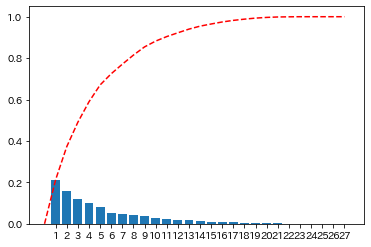

In [54]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)
ev_ratio = pca.explained_variance_ratio_
ev_ratio = np.hstack([0,ev_ratio.cumsum()])
plt.plot(ev_ratio, color='red', linestyle='dashed')
plt.xticks(range(1, X_train.shape[-1]+1))
plt.show()

In [55]:
n = 8
columns=[f'PC{i+1}' for i in range(n)]
X_train_pca = pd.DataFrame(X_train_pca[:,:n], columns=columns)
X_test_pca = pd.DataFrame(X_test_pca[:,:n], columns=columns)

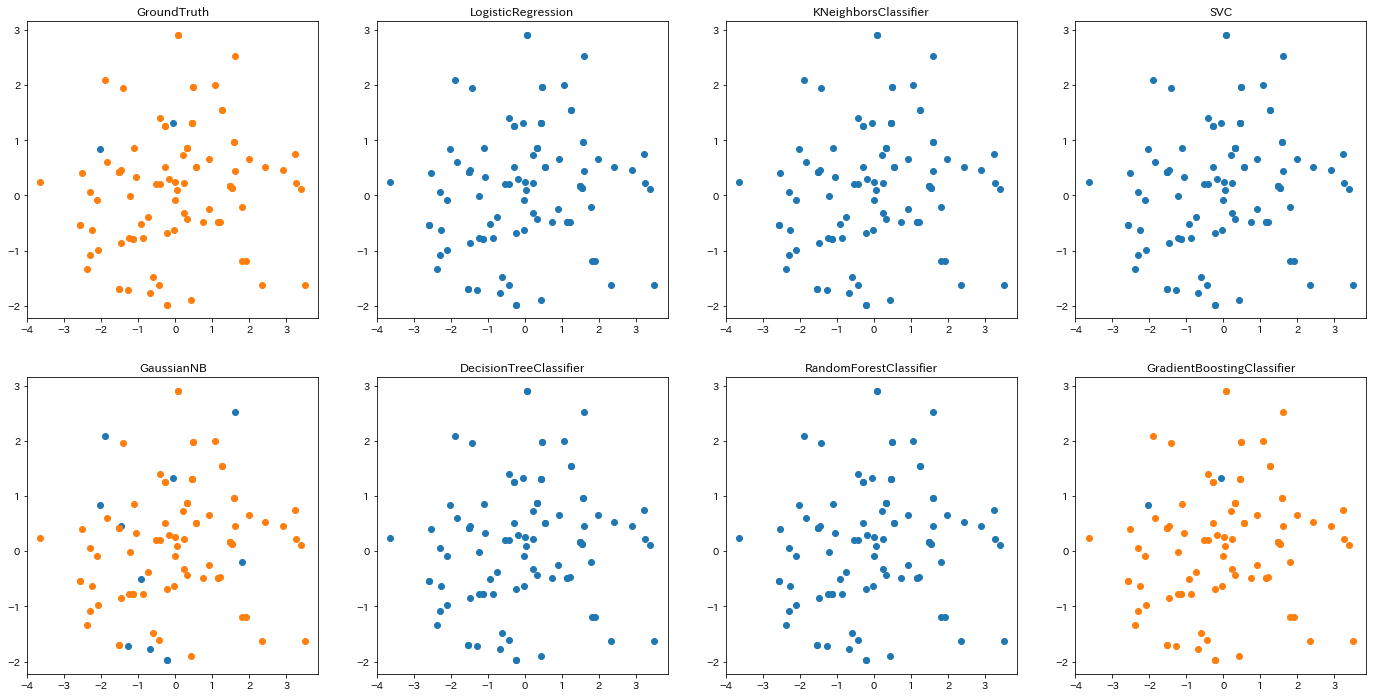

,モデル名,Accuracy(訓練),Precision(訓練),Recall(訓練),F1(訓練),Accuracy(テスト),Precision(テスト),Recall(テスト),F1(テスト)
0,LogisticRegression,0.976190,0.976190,1.000000,0.987952,0.978947,0.978947,1.000000,0.989362
1,KNeighborsClassifier,0.978836,0.983914,0.994580,0.989218,0.978947,0.978947,1.000000,0.989362
2,SVC,0.976190,0.976190,1.000000,0.987952,0.978947,0.978947,1.000000,0.989362
3,GaussianNB,0.939153,1.000000,0.937669,0.967832,0.905263,1.000000,0.903226,0.949153
4,DecisionTreeClassifier,0.984127,0.989218,0.994580,0.991892,0.978947,0.978947,1.000000,0.989362
5,RandomForestClassifier,0.976190,0.976190,1.000000,0.987952,0.978947,0.978947,1.000000,0.989362
6,GradientBoostingClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
df_model_comp = pd.DataFrame()

fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(24.0,12.0))
ax = ax.flatten()
for j in np.unique(y_test):
    X_tmp = X_test_pca[y_test.values == j]
    ax[0].scatter(X_tmp['PC1'], X_tmp['PC2'], label=j)
ax[0].set_title('GroundTruth')

for i, model in enumerate(models):
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['Accuracy(訓練)'] = metrics.accuracy_score(y_train, y_pred)
    dic['Precision(訓練)'] = metrics.precision_score(y_train, y_pred)
    dic['Recall(訓練)'] = metrics.recall_score(y_train, y_pred)
    dic['F1(訓練)'] = metrics.f1_score(y_train, y_pred)
    y_pred = model.predict(X_test)
    dic['Accuracy(テスト)'] = metrics.accuracy_score(y_test, y_pred)
    dic['Precision(テスト)'] = metrics.precision_score(y_test, y_pred)
    dic['Recall(テスト)'] = metrics.recall_score(y_test, y_pred)
    dic['F1(テスト)'] = metrics.f1_score(y_test, y_pred)
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
    for j in np.unique(y_pred):
        X_tmp = X_test_pca[y_pred == j]
        ax[i+1].scatter(X_tmp['PC1'], X_tmp['PC2'], label=j)
    ax[i+1].set_title(model.__class__.__name__)
plt.show()

df_model_comp